In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_excel('20-21.xlsx')

In [76]:
df

,代码,简称,时间,开盘价(元),收盘价(元),最高价(元),最低价(元),涨跌(元),涨跌幅(%),前收盘价(元)
0,000001.SZ,平安银行,2020-06-01,13.10,13.32,13.39,13.08,0.32,2.4615,13.00
1,000001.SZ,平安银行,2020-06-02,13.29,13.55,13.63,13.28,0.23,1.7267,13.32
2,000001.SZ,平安银行,2020-06-03,13.64,13.54,13.88,13.50,-0.01,-0.0738,13.55
3,000001.SZ,平安银行,2020-06-04,13.53,13.57,13.64,13.41,0.03,0.2216,13.54
4,000001.SZ,平安银行,2020-06-05,13.60,13.59,13.62,13.43,0.02,0.1474,13.57
...,...,...,...,...,...,...,...,...,...,...
24301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df = pd.DataFrame({
    'date': df['时间'],
    'code': df['代码'],
    'price': df['收盘价(元)'],
    'price_before': df['前收盘价(元)']
})

In [78]:
df.loc

In [79]:
df['standard'] = 1 + (df['price'] - df['price_before']) / df['price_before']

In [80]:
df['standard'].cumprod()

0        1.024615
1        1.042308
2        1.041538
3        1.043846
4        1.045385
           ...   
24301         NaN
24302         NaN
24303         NaN
24304         NaN
24305         NaN
Name: standard, Length: 24306, dtype: float64

In [81]:
df

,date,code,price,price_before,standard
0,2020-06-01,000001.SZ,13.32,13.00,1.024615
1,2020-06-02,000001.SZ,13.55,13.32,1.017267
2,2020-06-03,000001.SZ,13.54,13.55,0.999262
3,2020-06-04,000001.SZ,13.57,13.54,1.002216
4,2020-06-05,000001.SZ,13.59,13.57,1.001474
...,...,...,...,...,...
24301,NaN,NaN,NaN,NaN,NaN
24302,NaN,NaN,NaN,NaN,NaN
24303,NaN,NaN,NaN,NaN,NaN
24304,NaN,NaN,NaN,NaN,NaN


In [82]:
df['date'] = pd.to_datetime(df['date'])

In [83]:
x = df.pivot_table(index='date',columns='code',values='standard')

In [84]:
x

code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,000425.SZ,000426.SZ,000428.SZ,000429.SZ,000430.SZ,000488.SZ,000498.SZ,000501.SZ,000502.SZ,000503.SZ
date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,1.024615,1.027237,1.017313,1.015564,1.012474,1.065934,1.010033,1.026087,0.997506,1.035827,...,1.025554,1.091935,1.025559,1.020438,1.014706,1.020790,1.020202,1.100239,1.030722,1.005634
2020-06-02,1.017267,1.031818,0.993533,1.015326,1.036961,0.985109,0.996689,0.992938,0.972500,1.065107,...,1.011628,0.995569,1.006231,1.008584,0.995859,1.002037,1.003960,1.028200,0.989568,1.020542
2020-06-03,0.999262,0.985316,0.996917,0.996226,1.017822,0.941860,1.003322,0.984353,1.010283,1.100287,...,0.991790,0.976261,1.040248,0.998582,0.993763,0.995935,0.988166,0.969058,1.000000,1.009149
2020-06-04,1.002216,0.995902,1.027491,1.015152,0.996109,1.002469,0.993377,1.079480,1.000000,1.020833,...,0.981788,1.016717,1.101190,0.998580,1.004184,0.997959,0.990020,1.018868,1.009036,0.980054
2020-06-05,1.001474,0.988028,0.977926,0.992537,0.992188,1.019704,1.000000,0.970549,1.038168,0.960034,...,0.998314,1.083707,0.989189,0.994310,1.004167,1.004090,1.004032,0.921129,1.017910,1.029602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,1.047700,1.021764,1.024246,1.005780,1.005736,0.989101,1.004405,1.031579,0.992736,1.009934,...,0.992647,0.965952,0.996644,1.007013,1.003781,0.972821,0.991952,1.019625,0.996078,0.979239
2021-05-26,1.016667,1.015695,1.024952,1.011494,1.007605,1.005510,1.004386,0.996939,1.000000,1.042623,...,1.008889,1.037859,1.006734,1.001393,1.000000,1.049133,1.004057,1.006695,1.013780,1.027091
2021-05-27,0.991204,0.999264,0.988140,1.039773,1.001887,1.010959,0.991266,0.992835,0.995122,1.033019,...,1.010279,1.011321,0.996656,1.001391,1.005650,0.960514,0.995960,1.004156,0.998058,0.997706


In [85]:
# x.plot(subplots=True,layout=(10,10),figsize=(25,25),use_index=False,sharex=True,sharey=True,title='累计收益率')

In [86]:
y = list(x.columns)

In [110]:
len(x)

243

In [94]:
def form_ssd(data):
    data = data.cumprod()
    col = data.columns  # 取出列名
    name = []
    num = []

    for i in range(len(col)):
        for j in range(i+1, len(col)):
            name.append(col[i] + ' ' + col[j])
            num.append(sum((data[col[i]] - data[col[j]])**2))

    return dict(zip(name, num))

In [95]:
k = form_ssd(x)

In [96]:
sorted(k.items(),key=lambda x:x[1])

[('000008.SZ 000156.SZ', 0.32529879035754156),
 ('000409.SZ 000429.SZ', 0.44843711547526244),
 ('000031.SZ 000068.SZ', 0.46384198041810776),
 ('000068.SZ 000096.SZ', 0.5301849573140612),
 ('000055.SZ 000419.SZ', 0.5509289387506988),
 ('000008.SZ 000061.SZ', 0.5851876903412825),
 ('000023.SZ 000036.SZ', 0.5967974123808865),
 ('000055.SZ 000089.SZ', 0.6201917313495978),
 ('000061.SZ 000156.SZ', 0.6891477839769123),
 ('000402.SZ 000429.SZ', 0.7278721930551648),
 ('000036.SZ 000099.SZ', 0.7608583549651138),
 ('000156.SZ 000401.SZ', 0.7727930492269598),
 ('000008.SZ 000401.SZ', 0.7879240117415623),
 ('000005.SZ 000031.SZ', 0.790292305834742),
 ('000031.SZ 000061.SZ', 0.7913705073021852),
 ('000042.SZ 000401.SZ', 0.8027204212011181),
 ('000055.SZ 000099.SZ', 0.8048676407352205),
 ('000035.SZ 000096.SZ', 0.8624200266668446),
 ('000089.SZ 000419.SZ', 0.8656565103296672),
 ('000019.SZ 000068.SZ', 0.89253902035862),
 ('000021.SZ 000063.SZ', 0.8953853516750638),
 ('000019.SZ 000031.SZ', 0.8968879

In [97]:
k['000157.SZ 000488.SZ']

13.253210918073759

In [98]:
a = sorted(k.items(),key=lambda x:x[1])

In [99]:
a

[('000008.SZ 000156.SZ', 0.32529879035754156),
 ('000409.SZ 000429.SZ', 0.44843711547526244),
 ('000031.SZ 000068.SZ', 0.46384198041810776),
 ('000068.SZ 000096.SZ', 0.5301849573140612),
 ('000055.SZ 000419.SZ', 0.5509289387506988),
 ('000008.SZ 000061.SZ', 0.5851876903412825),
 ('000023.SZ 000036.SZ', 0.5967974123808865),
 ('000055.SZ 000089.SZ', 0.6201917313495978),
 ('000061.SZ 000156.SZ', 0.6891477839769123),
 ('000402.SZ 000429.SZ', 0.7278721930551648),
 ('000036.SZ 000099.SZ', 0.7608583549651138),
 ('000156.SZ 000401.SZ', 0.7727930492269598),
 ('000008.SZ 000401.SZ', 0.7879240117415623),
 ('000005.SZ 000031.SZ', 0.790292305834742),
 ('000031.SZ 000061.SZ', 0.7913705073021852),
 ('000042.SZ 000401.SZ', 0.8027204212011181),
 ('000055.SZ 000099.SZ', 0.8048676407352205),
 ('000035.SZ 000096.SZ', 0.8624200266668446),
 ('000089.SZ 000419.SZ', 0.8656565103296672),
 ('000019.SZ 000068.SZ', 0.89253902035862),
 ('000021.SZ 000063.SZ', 0.8953853516750638),
 ('000019.SZ 000031.SZ', 0.8968879

In [100]:
a[0][0].split()[0]

'000008.SZ'

In [101]:
x.loc[x.index[0]]['000001.SZ']

1.0246153846153847

In [111]:
def pair_trade(data, t_buy, t_sell):
    ssd_dict = form_ssd(data)
    first = sorted(ssd_dict.items(),key=lambda x:x[1])[0][0].split()[0]
    second = sorted(ssd_dict.items(),key=lambda x:x[1])[0][0].split()[1]
    price = data[first] - data[second]
    name = (first, second)

    mu = np.mean(price)
    sigma = np.std(price)
    high_buy = mu + t_buy * sigma
    low_buy = mu - t_buy * sigma
    high_sell = mu + t_sell * sigma
    low_sell = mu - t_sell * sigma

    print(price)

    print('最高容忍', high_buy)
    print('最低容忍', low_buy)
    print('最高卖出', high_sell)
    print('最高买入', low_sell)

    flag = 0

    buy = []
    sell = []
    signal = []

    for i in range(len(price)):
        if price[i] >= high_buy:
            if flag == 0:
                flag = 1
                continue
            elif flag == 1:
                buy.append(data.index[i])
                signal.append(flag)
                flag = 2
                continue

        if price[i] <= low_buy:
            if flag == 0:
                flag = -1
                continue
            elif flag == -1:
                buy.append(data.index[i])
                signal.append(flag)
                flag = -2
                continue

        if low_sell < price[i] < high_sell:
            if flag == 2 or flag == -2:
                sell.append(data.index[i])
                flag = 0

        if price[i] < mu - 3 * sigma or price[i] > mu + 3 * sigma:
            if flag == 2 or flag == -2:
                sell.append(data.index[i])
                flag = 0

    plt.plot(price)

    plt.axhline(y=mu,color='black')
    plt.axhline(y=mu+t_buy*sigma,color='green')
    plt.axhline(y=mu-t_buy*sigma,color='green')
    plt.axhline(y=mu+t_sell*sigma,color='red')
    plt.axhline(y=mu-t_sell*sigma,color='red')

    return buy, sell, signal, name

date
2020-06-01    0.008222
2020-06-02    0.007539
2020-06-03    0.006064
2020-06-04    0.008043
2020-06-05   -0.017674
                ...   
2021-05-25   -0.000823
2021-05-26    0.001785
2021-05-27   -0.010031
2021-05-28    0.013473
2021-05-31    0.000378
Length: 243, dtype: float64
最高容忍 0.028012595627417165
最低容忍 -0.027752058938659594
最高卖出 0.0038479119821172364
最高买入 -0.003587375293359665


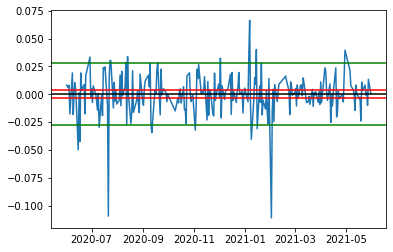

In [112]:
buy, sell, signal, name = pair_trade(x,1.5,0.2)

In [113]:
sell[:-1]

[Timestamp('2020-06-19 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-14 00:00:00'),
 Timestamp('2020-11-09 00:00:00'),
 Timestamp('2021-01-06 00:00:00')]

In [104]:
name[0]

'000008.SZ'

In [105]:
a = tuple(zip(buy,sell,signal))

In [106]:
a

((Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-19 00:00:00'), -1),
 (Timestamp('2020-07-23 00:00:00'), Timestamp('2020-08-07 00:00:00'), 1),
 (Timestamp('2020-08-13 00:00:00'), Timestamp('2020-08-14 00:00:00'), 1),
 (Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), -1),
 (Timestamp('2021-01-05 00:00:00'), Timestamp('2021-01-06 00:00:00'), 1),
 (Timestamp('2021-01-15 00:00:00'), Timestamp('2021-01-26 00:00:00'), -1))

In [107]:
y=x['000096.SZ']-x['000501.SZ']
y

date
2020-06-01   -0.089842
2020-06-02   -0.013232
2020-06-03    0.047532
2020-06-04   -0.013428
2020-06-05    0.108628
                ...   
2021-05-25   -0.017472
2021-05-26   -0.003472
2021-05-27   -0.004156
2021-05-28    0.007693
2021-05-31   -0.003681
Length: 243, dtype: float64

In [108]:
y.loc['2021-05-14']

-0.0355309887222649

ValueError: x and y must have same first dimension, but have shapes (244,) and (243,)

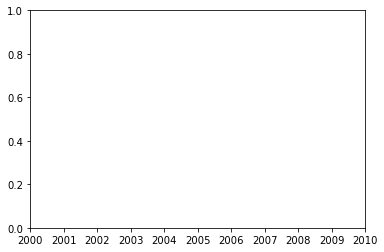

In [109]:
def back(stock, op, name_list, t_buy, t_sell, init_money):
    first = name_list[0]
    second = name_list[1]
    profit_list = []

    x_buy_list = []
    y_buy_list = []
    x_sell_list = []
    y_sell_list = []

    for i in range(len(op)):
        buy_date = op[i][0]
        sell_date = op[i][1]
        opt = op[i][2]

        first_buy = stock.loc[(stock['date'] == buy_date) & (stock['code'] == first)]['price'].iloc[0]
        first_sell = stock.loc[(stock['date'] == sell_date) & (stock['code'] == first)]['price'].iloc[0]
        second_buy = stock.loc[(stock['date'] == buy_date) & (stock['code'] == second)]['price'].iloc[0]
        second_sell = stock.loc[(stock['date'] == sell_date) & (stock['code'] == second)]['price'].iloc[0]

        first_stock = init_money / first_buy
        second_stock = init_money / second_buy

        profit = - opt * (first_sell * first_stock) + opt * (second_sell * second_stock)
        profit_list.append(profit)

        x_buy_list.append(buy_date)
        y_buy_list.append(first_buy)
        x_buy_list.append(buy_date)
        y_buy_list.append(second_buy)
        x_sell_list.append(sell_date)
        y_sell_list.append(first_sell)
        x_sell_list.append(sell_date)
        y_sell_list.append(second_sell)

    #plt.subplot(2,1,1)
    plt.plot(stock['date'].unique(), stock.loc[stock['code'] == first]['price'],color='grey')
    plt.plot(stock['date'].unique(), stock.loc[stock['code'] == second]['price'],color='red')
    plt.scatter(x_buy_list, y_buy_list, s=10, c='blue')  # stroke, colour
    plt.scatter(x_sell_list, y_sell_list, s=10, c='green')

    plt.show()

    #plt.subplot(2,1,2)

    s = stock.pivot_table(index='date',columns='code',values='standard')

    price = s[first] - s[second]
    plt.plot(price)

    mu = np.mean(price)
    sigma = np.std(price)

    #plt.axhline(y=mu,color='black')
    plt.axhline(y=mu + t_buy*sigma,color='green')
    plt.axhline(y=mu-t_buy*sigma,color='green')
    plt.axhline(y=mu+t_sell*sigma,color='red')
    plt.axhline(y=mu-t_sell*sigma,color='red')

    print(price)

    plt.scatter(x_buy_list, [price.loc[i] for i in x_buy_list], s=2, c='red')
    plt.scatter(x_sell_list, [price.loc[i] for i in x_sell_list], s=5, c='orange')

    plt.show()

    return profit_list

back(df, a, name, 1.5, 0.2, 1000)

In [ ]:
df